# 0. Import Dependencies and Pretrained Model

In [4]:
!pip install tensorflow_hub


[notice] A new release of pip available: 22.2.1 -> 23.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [9]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np


In [56]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [57]:
model

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x1609ee0e0>

# 1. Preprocess Image and Load

In [11]:
!ls

Neural Style Transfer-Template.ipynb monet.jpeg
andy.png                             output.png
dali.jpeg                            park.jpeg
frida.jpg                            profile.jfif
generated.jpg                        starrynight.jfif
generated_img.jpg                    vangogh.jpeg
klimt.jpg


In [62]:
from IPython import display

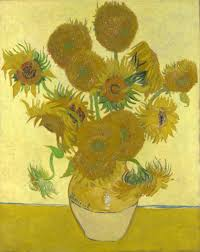

In [73]:
display.Image("vangogh.jpeg")

# Option 1. Based on Documentation

In [75]:
content_image_path="profile.jfif"
style_image_path="vangogh.jpeg"
# Load content and style images (see example in the attached colab).
content_image = plt.imread(content_image_path)
style_image = plt.imread(style_image_path)
# Convert to float32 numpy array, add batch dimension, and normalize to range [0, 1]. Example using numpy:
content_image = content_image.astype(np.float32)[np.newaxis, ...] / 255.
style_image = style_image.astype(np.float32)[np.newaxis, ...] / 255.
# Optionally resize the images. It is recommended that the style image is about
# 256 pixels (this size was used when training the style transfer network).
# The content image can be any size.
style_image = tf.image.resize(style_image, (256, 256))

# Load image stylization module.
hub_module = model
# Stylize image.
outputs = hub_module(tf.constant(content_image), tf.constant(style_image))
stylized_image = outputs[0]

plt.imshow(np.squeeze(stylized_image))
plt.axis('off')
plt.savefig('out.png', bbox_inches='tight', pad_inches=0)
plt.show()

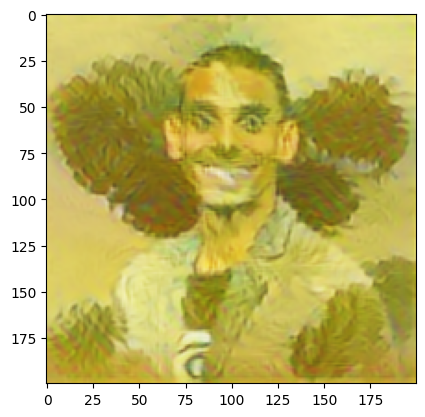

# Option 2 : Github Repo

In [18]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [22]:
content_image = load_image('profile.jfif')
style_image = load_image('monet.jpeg')

# 2. Visualize Output

In [23]:
content_image.shape

TensorShape([1, 200, 200, 3])

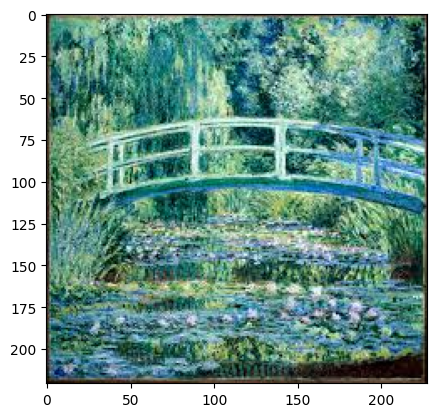

In [24]:
plt.imshow(np.squeeze(style_image))
plt.show()

# 3. Stylize Image

In [48]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

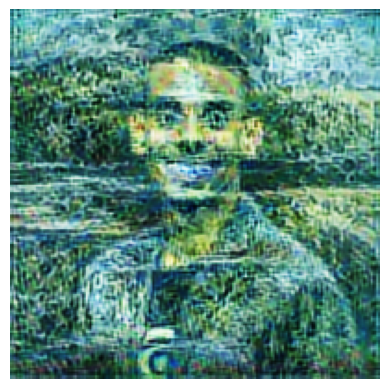

In [53]:
plt.imshow(np.squeeze(stylized_image))
plt.axis('off')
plt.savefig('out.png', bbox_inches='tight', pad_inches=0)
plt.show()

In [54]:
!ls

Neural Style Transfer-Template.ipynb klimt.jpg
andy.png                             monet.jpeg
dali.jpeg                            out.png
foo.jpeg                             output.png
foo.png                              park.jpeg
frida.jpg                            profile.jfif
generated.jpg                        starrynight.jfif
generated_img.jpg                    vangogh.jpeg


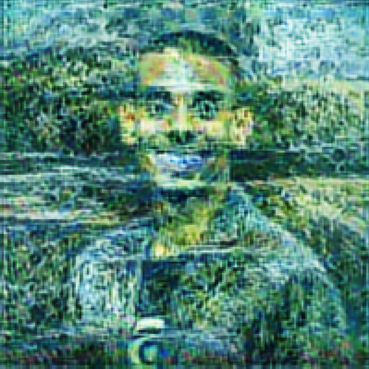

In [55]:
display.Image('out.png')